**更新版本v1.0到v1.1**

剔除训练及验证数据中label为-1(无标签)的数据，不将这部分数据用于训练模型。

在In[2]中添加下列语句： 

```anti_fraud_dataframe = anti_fraud_dataframe[anti_fraud_dataframe.label != -1]```

In [1]:
import os

os.chdir(r'G:\pycharm-workspace\2018ATEC\data')

In [2]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.set_option('display.max_columns', 350)
pd.options.display.float_format = '{:.4f}'.format

anti_fraud_dataframe = pd.read_csv("atec_anti_fraud_train.csv")
anti_fraud_dataframe = anti_fraud_dataframe[anti_fraud_dataframe.label != -1]
anti_fraud_dataframe = anti_fraud_dataframe.reindex(
    np.random.permutation(anti_fraud_dataframe.index))
anti_fraud_dataframe

D:\Install\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,id,label,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
844455,c985e641d342764b8b501ddb1b71b6479aa82a485f42ef...,0,20171029,1,1,1,1,100802.0000,0,6,0,0,1,2,1,1,2,1,2,2,2,2,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,16.0000,2.0000,1.0000,2.0000,3.0000,6.0000,16.0000,26.0000,15.0000,26.0000,1.0000,2.0000,1.0000,3.0000,17.0000,27.0000,90.0000,2787.7000,4280.2000,410.9000,822.1000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,3.0000,2.0000,2.0000,5.0000,7.0000,14.0000,24.0000,4.0000,8.0000,13.0000,24.0000,47.0000,3.0000,10.0000,17.0000,26.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,8.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,3.0000,1.0000,2.0000,1.0000,3.0000,3.0000,3.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,11.0000,17.0000,27.0000,53.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,4.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,0.0000,0.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,2.0000,2.0000,3.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000
56515,a9a964de1e30e50c13a0712d848829e99ae7e6a0357126...,0,20170910,0,0,1,1,100802.0000,0,7,2,2,2,2,1,1,1,0,1,1,1,0,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,3.0000,1.0000,4.0000,3.0000,3.0000,4.0000,3.0000,3.0000,3.0000,3.0000,2.0000,3.0000,4.0000,4.0000,4.0000,3.0000,129.0000,261.9000,260.9000,260.9000,260

In [3]:
def preprocess_features(anti_fraud_dataframe):
    selected_feature = anti_fraud_dataframe[
        ["f28", 
         "f29", 
         "f30", 
         "f31", 
         "f52", 
         "f53", 
         "f111", 
         "f112"]]
    processed_features = selected_feature.copy()
    processed_features = processed_features.fillna(-1)
    return processed_features

preprocess_features(anti_fraud_dataframe)

,f28,f29,f30,f31,f52,f53,f111,f112
844455,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,2.0000,1.0000
56515,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,2.0000
640914,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,215.0000,216.0000
592967,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,167.0000,168.0000
768884,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,2.0000,1.0000
...,...,...,...,...,...,...,...,...
155919,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
204053,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
511323,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,209.0000,210.0000
32469,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,2.0000


In [4]:
def preprocess_targets(anti_fraud_dataframe):
    output_targets = pd.DataFrame()
    output_targets["label"] = anti_fraud_dataframe["label"]
    return output_targets

preprocess_targets(anti_fraud_dataframe)

,label
844455,0
56515,0
640914,0
592967,0
768884,0
...,...
155919,0
204053,0
511323,0
32469,0


In [5]:
training_examples = preprocess_features(anti_fraud_dataframe.head(696312))
training_targets = preprocess_targets(anti_fraud_dataframe.head(696312))

validation_examples = preprocess_features(anti_fraud_dataframe.tail(298419))
validation_targets = preprocess_targets(anti_fraud_dataframe.tail(298419))

print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000,696312.0000
mean,0.1955,0.1968,0.2051,0.2058,0.2575,0.2724,70.7094,70.7131
std,0.7725,0.7739,0.8467,0.8536,0.9348,0.9743,96.0202,96.0190
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,192.0000,192.0000
max,13.0000,13.0000,25.0000,28.0000,31.0000,56.0000,252.0000,251.0000


Validation examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000,298419.0000
mean,0.1955,0.1977,0.2057,0.2060,0.2604,0.2726,70.6821,70.6863
std,0.7733,0.7749,0.8425,0.8484,0.9364,0.9739,96.0223,96.0216
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,192.0000,192.0000
max,12.0000,12.0000,25.0000,29.0000,31.0000,55.0000,251.0000,252.0000


Training targets summary:


,label
count,696312.0000
mean,0.0121
std,0.1095
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,1.0000


Validation targets summary:


,label
count,298419.0000
mean,0.0125
std,0.1110
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,1.0000


In [6]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
               for my_feature in input_features])
construct_feature_columns(training_examples)

{_NumericColumn(key='f111', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f112', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f28', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f29', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f30', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f31', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f52', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='f53', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)}

In [7]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(10000)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

my_input_fn(training_examples, 
            training_targets["label"], 
            batch_size=100)

({'f111': <tf.Tensor 'IteratorGetNext:0' shape=(?,) dtype=float64>,
  'f112': <tf.Tensor 'IteratorGetNext:1' shape=(?,) dtype=float64>,
  'f28': <tf.Tensor 'IteratorGetNext:2' shape=(?,) dtype=float64>,
  'f29': <tf.Tensor 'IteratorGetNext:3' shape=(?,) dtype=float64>,
  'f30': <tf.Tensor 'IteratorGetNext:4' shape=(?,) dtype=float64>,
  'f31': <tf.Tensor 'IteratorGetNext:5' shape=(?,) dtype=float64>,
  'f52': <tf.Tensor 'IteratorGetNext:6' shape=(?,) dtype=float64>,
  'f53': <tf.Tensor 'IteratorGetNext:7' shape=(?,) dtype=float64>},
 <tf.Tensor 'IteratorGetNext:8' shape=(?,) dtype=int64>)

In [8]:
def train_nn_regression_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
    periods = 10
    steps_per_period = steps / periods
    
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units
    )
    
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets["label"], 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets["label"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                      validation_targets["label"], 
                                                      num_epochs=1, 
                                                      shuffle=False)
    
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])

        validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
    
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
    print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

    return dnn_regressor

Training model...
RMSE (on training data):
  period 00 : 0.15
  period 01 : 0.14
  period 02 : 0.14
  period 03 : 0.14
  period 04 : 0.14
  period 05 : 0.13
  period 06 : 0.13
  period 07 : 0.13
  period 08 : 0.13
  period 09 : 0.13
Model training finished.
Final RMSE (on training data):   0.13
Final RMSE (on validation data): 0.13


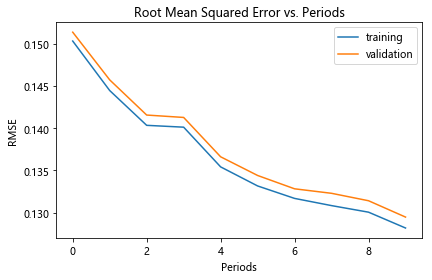

In [9]:
dnn_regressor = train_nn_regression_model(
    learning_rate=0.001,
    steps=2000,
    batch_size=100,
    hidden_units=[10, 10],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [10]:
anti_fraud_dataframe_test_data = pd.read_csv("atec_anti_fraud_test_a.csv")
display.display(anti_fraud_dataframe_test_data.describe())

,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
count,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,368604.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,370795.0000,370795.0000,370795.0000,370795.0000,370762.0000,370762.0000,370762.0000,370762.0000,369086.0000,369086.0000,369086.0000,369086.0000,318197.0000,318197.0000,318197.0000,318197.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,26533.0000,318532.0000,318532.0000,318532.0000,318532.0000,370795.0000,370795.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,318532.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,178207.0000,178207.0000,178207.0000,178207.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,173244.0000,173244.0000,173244.0000,173244.0000,173244.0000,178207.0000,178207.0000,178207.0000,178207.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,179252.0000,178207.0000,178207.0000,178207.0000,178207.0000,178207.0000,178207.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,406292.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.0000,489964.

In [11]:
anti_fraud_dataframe_test_data['label'] = 0.0
test_examples = preprocess_features(anti_fraud_dataframe_test_data)

print("Test examples summary:")
display.display(test_examples.describe())

test_targets = pd.DataFrame()
test_targets["label"] = (anti_fraud_dataframe_test_data["label"])
display.display(test_targets.describe())

Test examples summary:


,f28,f29,f30,f31,f52,f53,f111,f112
count,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000,491668.0000
mean,0.1255,0.1258,0.1249,0.1271,0.1297,0.1329,5.7558,5.7621
std,0.7800,0.7804,0.7797,0.7811,0.7776,0.7796,33.9282,33.9297
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
75%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
max,1.0000,4.0000,1.0000,5.0000,1.0000,3.0000,243.0000,243.0000


,label
count,491668.0000
mean,0.0000
std,0.0000
min,0.0000
25%,0.0000
50%,0.0000
75%,0.0000
max,0.0000


In [12]:
predict_testing_input_fn = lambda: my_input_fn(test_examples, 
                                               test_targets["label"], 
                                               num_epochs=1, 
                                               shuffle=False)

In [13]:
test_predictions = dnn_regressor.predict(input_fn=predict_testing_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])
display.display(test_predictions, len(test_predictions))

predictions = pd.DataFrame()
predictions['score'] = pd.Series(test_predictions)
predictions['score']

array([ 0.0592166 ,  0.00347422, -0.03767253, ..., -0.01126083,
        0.04717029,  0.01104177], dtype=float32)

491668

0         0.0592
1         0.0035
2        -0.0377
3        -0.0048
4         0.0057
           ...  
491663    0.0547
491664    0.1177
491665   -0.0113
491666    0.0472
491667    0.0110
Name: score, Length: 491668, dtype: float32

In [14]:
result = pd.concat([anti_fraud_dataframe_test_data["id"], predictions['score']], axis=1)
result.describe()

,score
count,491668.0000
mean,0.0264
std,0.0458
min,-0.3762
25%,0.0024
50%,0.0363
75%,0.0547
max,0.5670


In [15]:
result.loc[result["score"]<0, "score"] = 0
result.describe()

,score
count,491668.0000
mean,0.0348
std,0.0316
min,0.0000
25%,0.0024
50%,0.0363
75%,0.0547
max,0.5670


In [16]:
result[["id", "score"]].to_csv('submission.csv', index=False)